# Forest Soil Characteristics Dataset

About this dataset: From Kaggle (https://www.kaggle.com/datasets/shubhamgupta012/forest-soil-characteristics-dataset)

"This dataset provides a comprehensive collection of forest soil characteristics, including various parameters and measurements. It contains data from different sites, each identified by a unique site code.

This dataset serves as a valuable resource for researchers, ecologists, and environmental scientists interested in studying forest soil characteristics and their impact on ecosystem dynamics. It can be used for various purposes, such as analyzing nutrient cycling, evaluating soil quality, and understanding the effects of land use changes on soil properties. The dataset provides a rich source of information that can contribute to a better understanding of forest ecosystems and support evidence-based decision-making in forestry and land management practices." (Kaggle)

Columns:
- HouseID
- REP#: replicate number
- CoreID: core identification
- Depth: depth range
  - soil depth (cm)
- LU_Current: current land use
- LU_Previous: previous land use
- Yr_Built: year built
- Lawn Age:
- CoarseVeg: coarse vegetation
- StructDen [StructDensity]: structural density
  - The ratio of the total ground floor area of a building to the total land area of the lot.
- BD: bulk density
  - The standard measure of soil density is bulk density, defined as the proportion of the weight of a soil relative to its volume, typically expressed as g/cm3 of soil. Compacted soils exhibit increased bulk density. Affects root and plant growth.
  - Info about BD: https://stormwater.pca.state.mn.us/index.php?title=Soil_health_indicator_sheet_-_Soil_compaction_(bulk_density)#:~:text=Bulk%20densities%20in%20undisturbed%20soils,soils%20exhibit%20increased%20bulk%20density.
- N_Perc: nitrogen percentage
- C_Perc: carbon percentage
- C_N: carbon to nitrogen ratio
- N_gm2: nitrogen content in grams per square meter
- C_gm2: carbon content in grams per square meter
- Sand_Perc: percentage of sand
- Clay_Perc: percentage of clay
- Silt_Perc: percentage of silt
- MB Carbon: microbial biomass carbon
  - https://www.soilquality.org.au/factsheets/microbial-biomass-carbon-nsw
- Respiration: bacterial respiration
  - "When water fills more than 80 percent of the pore space, soil respiration reduces to a minimum level and most aerobic  micro-organisms begin to use nitrate (NO3) instead of oxygen, resulting in loss of nitrogen as gases (N2 and nitrogen oxides), emission of potent greenhouse gases, reduction in yields, and an increased need for nitrogen (N) fertilizer, which increases cost." (https://www.nrcs.usda.gov/sites/default/files/2022-10/Soil%20Respiration.pdf) 
- Initial NO3 (+NO2) [Initial Nitrates]: initial nitrate and nitrite content
- Initial NH4: initial ammonium content
- MBN [MB Nitrogen]: microbial biomass nitrogen
- Net N Min: net nitrogen mineralization
  - Mineralization is the process by which organic nitrogen is converted to plant available inorganic forms. It is regarded as a potential indicator to comprehend the soil's response to biological change
- Net Nitr: net nitrification
  - Nitrification is where most nitrogen is leached into the soil and can contaminate ground water

What's missing that would be nice to have:
- Temperature of soil
- pH of soil

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
soil_df = pd.read_csv("datasets\Forest Soil Characteristics.csv")
pd.set_option("display.max_columns", 999)

In [3]:
soil_df.tail()

,Site,HouseID,REP#,CoreID,Depth,LU_Current,LU_Previous,Yr_Built,Lawn Age,CoarseVeg,StructDen,BD,N_Perc,C_Perc,C_N,N_gm2,C_gm2,Sand_Perc,Clay_Perc,Silt_Perc,MB Carbon,Respiration,Initial NO3 (+NO2),Initial NH4,MBN,Net N Min,Net Nitr
323,House30,30.0,2,30.2,10to30,Residential,Forest,1952.0,55.0,4+,1,1.245,0.071,1.967,27.698,176.830,4897.833,28.375,28.750,42.875,155.68,4.005,8.548,1.002,13.376,0.306,0.374
324,House30,30.0,1,30.1,30to70,Residential,Forest,1952.0,55.0,4+,1,1.297,0.040,0.532,13.465,204.868,2758.625,37.719,25.013,37.269,88.59,3.170,1.142,0.571,1.641,-0.029,-0.001
325,House30,30.0,2,30.2,30to70,Residential,Forest,1952.0,55.0,4+,1,1.420,0.035,0.427,12.067,201.191,2427.722,33.875,29.500,36.625,113.83,2.449,1.640,0.264,2.428,0.017,0.017
326,House30,30.0,1,30.1,70to100,Residential,Forest,1952.0,55.0,4+,1,1.662,0.047,0.579,12.201,236.756,2888.764,32.324,20.766,46.910,149.03,3.608,1.084,0.568,2.464,0.005,0.033
327,House30,30.0,2,30.2,70to100,Residential,Forest,1952.0,55.0,4+,1,0.935,0.049,0.585,11.872,138.267,1641.546,33.342,21.261,45.398,94.6,2.716,1.356,0.261,1.176,0.074,0.074


In [4]:
soil_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328 entries, 0 to 327
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Site                328 non-null    object 
 1   HouseID             264 non-null    float64
 2   REP#                328 non-null    int64  
 3   CoreID              328 non-null    object 
 4   Depth               328 non-null    object 
 5   LU_Current          328 non-null    object 
 6   LU_Previous         264 non-null    object 
 7   Yr_Built            264 non-null    float64
 8   Lawn Age            264 non-null    float64
 9   CoarseVeg           264 non-null    object 
 10  StructDen           264 non-null    object 
 11  BD                  322 non-null    float64
 12  N_Perc              320 non-null    float64
 13  C_Perc              320 non-null    float64
 14  C_N                 291 non-null    float64
 15  N_gm2               321 non-null    float64
 16  C_gm2   

## EDA and Cleaning

In [16]:
soil_df.duplicated().sum()

0

In [5]:
soil_df.isnull().mean()*100

Site                   0.000000
HouseID               19.512195
REP#                   0.000000
CoreID                 0.000000
Depth                  0.000000
LU_Current             0.000000
LU_Previous           19.512195
Yr_Built              19.512195
Lawn Age              19.512195
CoarseVeg             19.512195
StructDen             19.512195
BD                     1.829268
N_Perc                 2.439024
C_Perc                 2.439024
C_N                   11.280488
N_gm2                  2.134146
C_gm2                  2.134146
Sand_Perc             14.024390
Clay_Perc             14.024390
Silt_Perc             14.024390
MB Carbon              2.439024
Respiration            2.439024
Initial NO3 (+NO2)     2.439024
Initial NH4            2.439024
MBN                    2.743902
Net N Min              2.743902
Net Nitr               2.743902
dtype: float64

In [6]:
soil_df.shape

(328, 27)

In [7]:
print(f"Previous Land Use: {soil_df['LU_Previous'].unique()}")
print(f"Current Land Use: {soil_df['LU_Current'].unique()}")

Previous Land Use: [nan 'Ag' 'Forest']
Current Land Use: ['Forest' 'Residential']


In [8]:
soil_df.describe()

,HouseID,REP#,Yr_Built,Lawn Age,BD,N_Perc,C_Perc,C_N,N_gm2,C_gm2,Sand_Perc,Clay_Perc,Silt_Perc,Respiration,Initial NO3 (+NO2),Initial NH4,MBN,Net N Min,Net Nitr
count,264.000000,328.000000,264.000000,264.000000,322.000000,320.000000,320.000000,291.000000,321.000000,321.000000,282.000000,282.000000,282.000000,320.000000,320.000000,320.000000,319.000000,319.000000,319.000000
mean,16.621212,1.615854,1972.181818,34.818182,1.102003,0.078947,1.059263,12.112962,111.340785,1404.591776,43.047330,23.550691,33.403415,5.606775,5.033394,2.669500,28.089273,0.240232,0.204881
std,9.139003,0.604766,18.069498,18.069498,0.211488,0.078247,1.160559,4.780619,91.622289,1422.834436,15.995809,9.994355,10.839772,4.729636,8.040060,4.392406,38.545303,0.709831,0.474282
min,1.000000,1.000000,1920.000000,5.000000,0.493000,0.000000,0.000000,4.844000,0.000000,0.000000,7.125000,1.251000,5.853000,0.925000,0.227000,0.201000,0.488000,-0.592000,-0.575000
25%,9.000000,1.000000,1963.000000,18.000000,0.950250,0.021000,0.192000,9.186500,0.000000,282.192000,32.341000,17.248000,24.821750,2.823750,0.265750,0.586750,1.863500,-0.021500,0.000000
50%,17.000000,2.000000,1968.000000,39.000000,1.134500,0.045500,0.522500,11.432000,116.667000,1171.990000,41.522000,22.642000,34.155000,3.687500,1.379500,1.083000,8.474000,0.043000,0.026000
75%,24.000000,2.000000,1989.000000,44.000000,1.253000,0.128000,1.765750,13.287000,176.739000,2160.853000,52.409250,30.562250,40.582500,5.846250,6.869500,2.592000,38.446500,0.301000,0.201500
max,32.000000,3.000000,2002.000000,87.000000,1.718000,0.333000,4.919000,41.996000,508.428000,11306.278000,89.489000,54.041000,66.100000,30.720000,59.750000,34.928000,174.977000,9.419000,4.907000


- Year between 1920 and 2002, mean 1972
  - Lawn Age between 5 and 87 years
- Average BD is 1.10, but what is it like in the different soil types?
- Land Use: 
  - Previous Land Use: Agriculture, Forest, or missing
  - Current Land Use: Forest, Residental
- 

In [9]:
soil_df["Yr_Built"].unique()

array([  nan, 1989., 1980., 1978., 2002., 1963., 1998., 1962., 1920.,
       1965., 1953., 1990., 1994., 1997., 2001., 1969., 1987., 1960.,
       1959., 1964., 1967., 1948., 1968., 1952.])

#### Cleaning Column Names

In [10]:
soil_df.rename(columns = {"MBN": "MB Nitrogen", "Initial NO3 (+NO2)": "Initial Nitrates", 
                          "StructDen": "StructDensity"}, inplace = True)
soil_df.columns

Index(['Site', 'HouseID', 'REP#', 'CoreID', 'Depth', 'LU_Current',
       'LU_Previous', 'Yr_Built', 'Lawn Age', 'CoarseVeg', 'StructDensity',
       'BD', 'N_Perc', 'C_Perc', 'C_N', 'N_gm2', 'C_gm2', 'Sand_Perc',
       'Clay_Perc', 'Silt_Perc', 'MB Carbon', 'Respiration',
       'Initial Nitrates', 'Initial NH4', 'MB Nitrogen', 'Net N Min',
       'Net Nitr'],
      dtype='object')

#### Percent Missing

In [11]:
for col in soil_df:
    pct_missing = soil_df[col].isnull().mean()*100
    if pct_missing > 0:
        print(col, "-", pct_missing)


HouseID - 19.51219512195122
LU_Previous - 19.51219512195122
Yr_Built - 19.51219512195122
Lawn Age - 19.51219512195122
CoarseVeg - 19.51219512195122
StructDensity - 19.51219512195122
BD - 1.8292682926829267
N_Perc - 2.4390243902439024
C_Perc - 2.4390243902439024
C_N - 11.28048780487805
N_gm2 - 2.1341463414634148
C_gm2 - 2.1341463414634148
Sand_Perc - 14.02439024390244
Clay_Perc - 14.02439024390244
Silt_Perc - 14.02439024390244
MB Carbon - 2.4390243902439024
Respiration - 2.4390243902439024
Initial Nitrates - 2.4390243902439024
Initial NH4 - 2.4390243902439024
MB Nitrogen - 2.7439024390243905
Net N Min - 2.7439024390243905
Net Nitr - 2.7439024390243905


In [12]:
soil_type = soil_df.groupby("CoreID", dropna = True)[
    "Clay_Perc", "Sand_Perc", "Silt_Perc", "Respiration", "Initial Nitrates", "Initial NH4"].mean()
soil_type.head(10)

C:\Users\omdel\AppData\Local\Temp\ipykernel_2396\1920194622.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  soil_type = soil_df.groupby("CoreID", dropna = True)[


,Clay_Perc,Sand_Perc,Silt_Perc,Respiration,Initial Nitrates,Initial NH4
CoreID,,,,,,
1.1,25.702500,47.964000,26.333500,8.670500,1.055250,1.645750
1.2,29.105333,49.254667,21.640667,9.762500,1.785500,1.538500
10.1,20.745000,37.766000,41.490000,17.800000,32.684000,1.979000
10.2,35.158333,19.019667,45.821667,10.949750,9.947000,1.575500
10.3,32.000000,20.337667,47.662333,4.907000,4.033333,1.175667
11.1,26.685000,27.726750,45.587750,3.099250,6.291000,0.528750
11.2,33.138000,19.907000,46.955000,2.891667,2.794000,0.713000
12.1,32.028750,27.088750,40.882250,7.236250,5.394750,1.774500
12.2,35.854667,25.166000,38.979333,5.371000,10.316500,0.651750


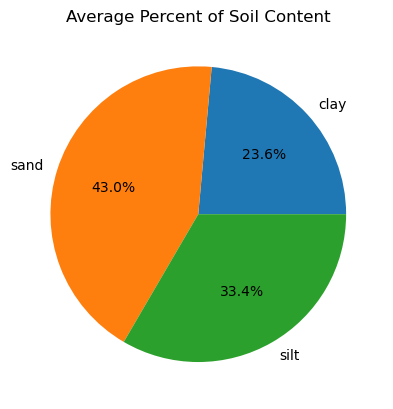

In [13]:
soil_types_chart = pd.DataFrame({
    "clay": soil_df["Clay_Perc"], "sand": soil_df["Sand_Perc"], "silt": soil_df["Silt_Perc"]}).mean()
soil_labels = ["clay", "sand", "silt"]

plt.pie(soil_types_chart, labels = soil_labels, autopct = '%1.1f%%')
plt.title("Average Percent of Soil Content")
plt.show()

In [19]:
depth_soil = soil_df.groupby("Depth").mean()

depth_soil

C:\Users\omdel\AppData\Local\Temp\ipykernel_2396\3006504737.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  depth_soil = soil_df.groupby("Depth").mean()


,HouseID,REP#,Yr_Built,Lawn Age,BD,N_Perc,C_Perc,C_N,N_gm2,C_gm2,Sand_Perc,Clay_Perc,Silt_Perc,Respiration,Initial Nitrates,Initial NH4,MB Nitrogen,Net N Min,Net Nitr
Depth,,,,,,,,,,,,,,,,,,,
0to10,16.621212,1.585366,1972.181818,34.818182,0.851817,0.196707,2.730829,14.057024,138.284695,1811.313061,41.467071,17.839048,40.686786,10.803049,12.832765,4.451568,84.858148,0.794000,0.578469
10to30,16.621212,1.609756,1972.181818,34.818182,1.108085,0.066598,0.886549,13.658062,125.084329,1667.172000,38.428341,23.774573,37.797061,4.557432,3.634741,3.329160,17.877444,0.117654,0.190123
30to70,16.621212,1.634146,1972.181818,34.818182,1.222160,0.029646,0.344899,10.668662,123.998887,1467.301275,43.190815,26.246494,30.566383,3.317074,1.832506,1.569901,4.470012,-0.000198,0.022173
70to100,16.621212,1.634146,1972.181818,34.818182,1.235558,0.017273,0.196000,8.822444,54.860013,626.676403,48.677273,23.591870,27.736130,3.653065,1.667338,1.257649,3.642421,0.036921,0.017171
